# 🏠 Ames Housing Price Prediction Project

This notebook builds a complete machine learning pipeline to predict house prices using the **Ames Housing dataset**. Compared to other real estate datasets, Ames contains rich information: 80+ features about the physical properties, location, and condition of houses.

We'll go through the **full ML lifecycle**:
- Data loading and cleaning
- Exploratory data analysis (EDA)
- Feature engineering and preprocessing
- Model training (Random Forest)
- Evaluation using proper metrics
- Saving the model for deployment

We also handle challenges like missing values, data skew, and categorical variable encoding — making this a real-world style ML workflow.

In [78]:
# 📌 Ames Housing Price Prediction Pipeline

# ## 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

## 📂 Load Dataset & Inspect

The dataset is read from a CSV file. We start by checking the size and content of the data using `.shape` and `.head()`.

This gives us a quick overview of:
- How many rows and columns we have
- Whether the dataset loaded correctly
- What the column names look like

In [79]:
# ## 2. Load Dataset
df = pd.read_csv('AmesHousing.csv')

In [80]:
display(df)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [81]:
# ## 3. Initial Data Exploration
print("Dataset shape:", df.shape)
df.info()
df.describe()
df.head()

Dataset shape: (2930, 82)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   o

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [82]:
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

print(f"Total columns with missing values: {len(missing)}")
missing.head(20)  # Show the top 20 columns with the most missing values

Total columns with missing values: 27


Pool QC           2917
Misc Feature      2824
Alley             2732
Fence             2358
Mas Vnr Type      1775
Fireplace Qu      1422
Lot Frontage       490
Garage Cond        159
Garage Qual        159
Garage Finish      159
Garage Yr Blt      159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
Bsmt Cond           80
Bsmt Qual           80
BsmtFin Type 1      80
Mas Vnr Area        23
Bsmt Half Bath       2
Bsmt Full Bath       2
dtype: int64

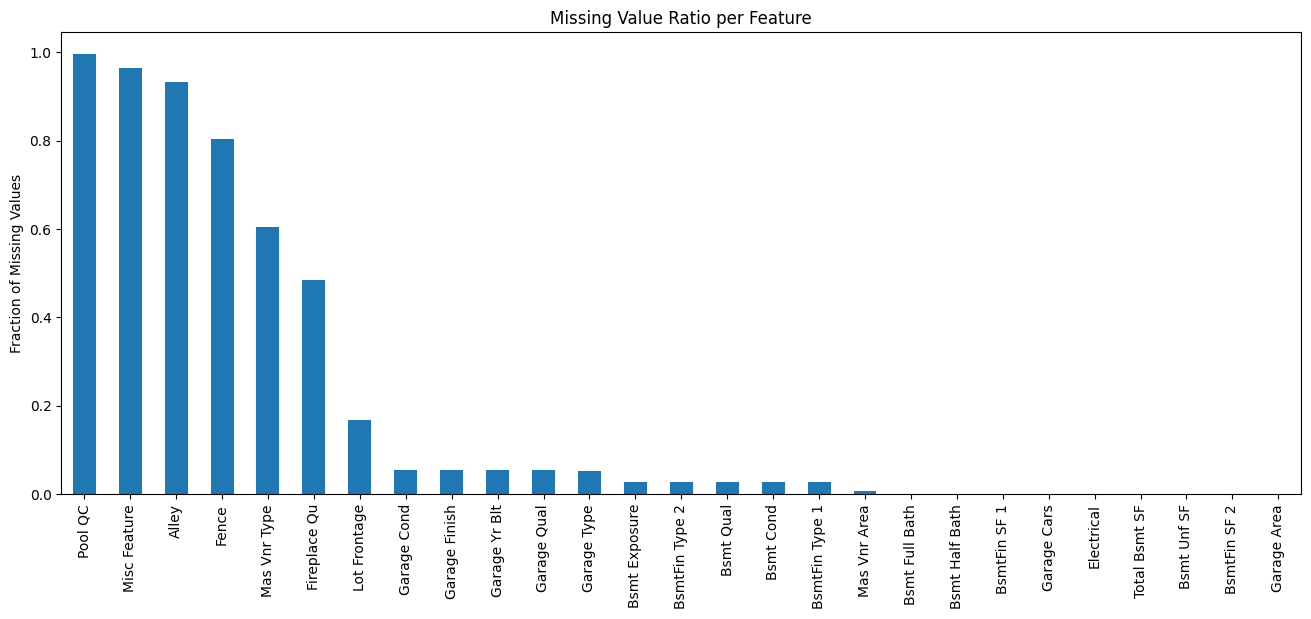

In [83]:
plt.figure(figsize=(16, 6))
missing_ratio = df.isnull().mean().sort_values(ascending=False)
missing_ratio[missing_ratio > 0].plot(kind='bar')
plt.title('Missing Value Ratio per Feature')
plt.ylabel('Fraction of Missing Values')
plt.xticks(rotation=90)
plt.show()

## 🚮 Drop High-Null Columns

Columns like `Pool QC`, `Misc Feature`, `Alley`, and `Fence` have more than **90% missing values**.

We drop them because:
- They're sparsely populated and hard to impute
- They're unlikely to add significant predictive power
- Keeping them would just add noise to the model

This is a common real-world practice — too much missing data usually means the feature isn’t useful for most observations.

In [84]:
# ## 6. Drop columns with excessive missing values (>90%)
high_null_cols = ['Pool QC', 'Misc Feature', 'Alley', 'Fence']
df.drop(columns=high_null_cols, inplace=True)

## 🧹 Impute Categorical Features with 'None'

For many features, missing values actually mean **the absence of something** — for example:
- `FireplaceQu` is missing when there's no fireplace
- `GarageType` is missing when there's no garage

So instead of filling with the mode or dropping, we use `'None'` to explicitly mark that the feature doesn’t exist for that row. This helps the model understand that “no garage” or “no basement” is a legitimate condition, not just missing info.

In [85]:
# ## 7. Impute Categorical Columns with 'None'
fill_none_cols = [
    'Mas Vnr Type', 'Fireplace Qu', 'Garage Type', 'Garage Finish',
    'Garage Qual', 'Garage Cond', 'Bsmt Exposure', 'BsmtFin Type 2',
    'Bsmt Qual', 'Bsmt Cond', 'BsmtFin Type 1'
]
for col in fill_none_cols:
    df[col] = df[col].fillna('None')

## 🔧 Impute Numerical Features with Median

For numeric features (e.g., `Lot Frontage`, `Garage Yr Blt`), we fill missing values using the **median**.

Why median?
- It's more robust to outliers than the mean
- It preserves the overall distribution better

We want to avoid skewing the dataset with artificial values, especially for quantities like square footage or year built.

In [86]:
# ## 8. Impute Numeric Columns with Median
median_fill_cols = [
    'Lot Frontage', 'Mas Vnr Area', 'Bsmt Full Bath', 'Bsmt Half Bath',
    'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
    'Garage Yr Blt', 'Garage Cars', 'Garage Area'
]
for col in median_fill_cols:
    df[col] = df[col].fillna(df[col].median())

In [87]:
# ## 9. Fill single categorical value with mode
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

## ✅ Final Missing Value Check

After all our imputations, we run a final check to ensure **no missing values remain**.

Why?
- Many ML models in scikit-learn **do not accept NaNs**
- It confirms that our data cleaning pipeline is complete

In [88]:
# ## 10. Check no missing values remain
assert not df.isnull().any().any(), "There are still missing values!"

## 📈 Why Log-transform the Target?

The `SalePrice` column is **right-skewed**, meaning there are many moderately priced homes and a few very expensive ones pulling the average up.

A log transformation helps:
- Normalize the distribution of prices
- Make regression models more stable and less sensitive to extreme values
- Reduce the influence of outliers

We use `np.log1p()` instead of `np.log()` to handle any zero values gracefully.

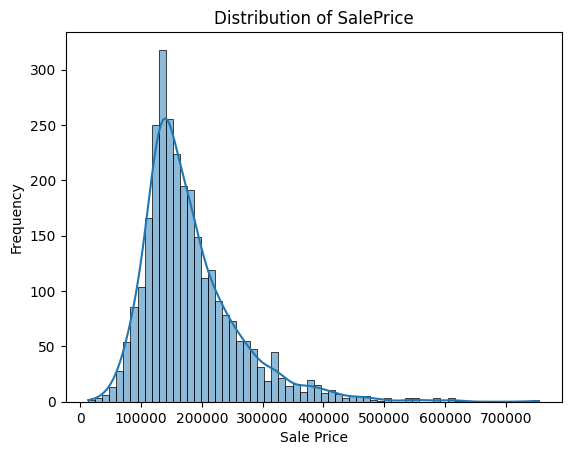

In [89]:
sns.histplot(df['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

In [90]:
corr = df.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False)
print(corr.head(10))

SalePrice         1.000000
Overall Qual      0.799262
Gr Liv Area       0.706780
Garage Cars       0.647812
Garage Area       0.640381
Total Bsmt SF     0.632164
1st Flr SF        0.621676
Year Built        0.558426
Full Bath         0.545604
Year Remod/Add    0.532974
Name: SalePrice, dtype: float64


In [91]:
# ## 5. Log-transform the target to reduce skewness
df['SalePrice'] = np.log1p(df['SalePrice'])

## 🎯 Define Features and Target

We separate:
- `y`: the target column (`SalePrice`, log-transformed)
- `X`: all other columns, which serve as features

This is the standard supervised learning format: one target variable, many predictors.

In [92]:
# ## 11. Feature/Target Split
y = df['SalePrice']
X = df.drop('SalePrice', axis=1)

## 🔎 Detect Numeric vs. Categorical Features

We use `select_dtypes()` to split features into:
- **Numerical**: things like square footage, year built, number of baths
- **Categorical**: text labels like neighborhood, exterior type, garage type

This distinction is important because:
- Numeric features need scaling
- Categorical features need encoding
- Missing values in each type should be treated differently

In [93]:
# ## 12. Identify Feature Types
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

## 🛠️ Build Preprocessing Pipelines

We create two separate pipelines:
- **Numerical pipeline**:
    - Impute missing values with median
    - Scale features using `StandardScaler` to normalize them
- **Categorical pipeline**:
    - Impute with the most frequent value (mode)
    - Encode using `OneHotEncoder`

We combine these using `ColumnTransformer` — this allows us to apply each pipeline to only the appropriate columns.

In [94]:
# Numeric pipeline: impute missing (just in case) + scale
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categorical pipeline: fill missing + one-hot encode
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [95]:
# ## 13. Create Preprocessing Pipelines
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, numeric_features),
    ('cat', categorical_pipeline, categorical_features)
])

## 🧱 Build and Train the Full Pipeline

We integrate:
- Preprocessing steps (from above)
- A `RandomForestRegressor` model

This unified pipeline:
- Makes the whole process reproducible
- Reduces risk of human error
- Ensures preprocessing is applied consistently at training and prediction time

In [96]:
# ## 14. Build Full Pipeline with Model
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# ## 15. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ## 16. Train the Pipeline
model_pipeline.fit(X_train, y_train)

# ## 17. Predict and Evaluate
y_pred = model_pipeline.predict(X_test)

## 📊 Evaluate Model Performance

We assess the model using:
- **R² score**: how much variance in `SalePrice` our model explains
- **RMSE (log scale)**: average error in log units
- **RMSE (real scale)**: average prediction error in dollars (after reversing log1p)

This gives a full picture of how well the model generalizes and how useful it would be in a real-world setting.

In [97]:
# Metrics (on log scale)
rmse_log = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Convert back to actual $ for RMSE
y_test_actual = np.expm1(y_test)
y_pred_actual = np.expm1(y_pred)
rmse_actual = np.sqrt(mean_squared_error(y_test_actual, y_pred_actual))

print(f"R² score (log scale): {r2:.4f}")
print(f"RMSE (log scale): {rmse_log:.4f}")
print(f"RMSE (original $): ${rmse_actual:,.2f}")

R² score (log scale): 0.9219
RMSE (log scale): 0.1202
RMSE (original $): $26,510.42
